In [274]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import pandas as pd

iris_data = load_iris()
iris_x = iris_data.data  
iris_y = iris_data.target  
iris_x_frame = pd.DataFrame(iris_x, columns=iris_data.feature_names)
iris_features = iris_data.feature_names 
iris_classes = iris_data.target_names 

In [275]:
iris_x_frame.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [276]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(iris_x)

pd.DataFrame(x_pca).head(10)

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


In [277]:
def plus_plus_center_selection(data, K):
    data_count = data.shape[0]
    centers = []

    centers.append(data[np.random.randint(0, data_count)])

    for _ in range(1, K):
        min_distances = []
        for i in range(data.shape[0]):  
            distances = []
            for center in centers:  
                distance = np.sum((data[i] - center) ** 2)  
                distances.append(distance)
            min_distances.append(min(distances))  
          
        probabilities = np.array(min_distances) / np.sum(min_distances)
        sum_probs = []

        sum = 0
        for prob in probabilities:
            sum += prob
            sum_probs.append(sum)

        r = np.random.rand()
        i = 0
        for p in sum_probs:
            if r < p:
                centers.append(data[i])
                break
            i += 1

    return np.array(centers)

def kmeans_normal(data, k, iter=100):
    centers = []
    while len(centers) < k:
        temp = np.random.randint(0, len(data))  
        if temp not in centers:  
            centers.append(temp)
        
    centers = [data[idx] for idx in centers]
    centers = np.array(centers)  

    labels = np.zeros(data.shape[0], dtype=int)

    for i in range(iter):
        distances = []
        for center in centers:
            distance_to_center = []
            for point in data:
                distance_to_center.append(np.linalg.norm(point - center))  
            distances.append(distance_to_center)

        distances = np.array(distances).T
        labels = np.argmin(distances, axis=1)

        upd_centers = []
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) == 0:
                upd_centers.append(centers[j])  
            else:
                upd_centers.append(cluster_points.mean(axis=0))  

        centers = np.array(upd_centers)

    return labels

def kmeans_plus_plus(data,k, iter=100):
    centers = plus_plus_center_selection(data, k)
    
    labels = np.zeros(data.shape[0], dtype=int)

    for i in range(iter):
        distances = []
        for center in centers:
            distance_to_center = []
            for point in data:
                distance_to_center.append(np.linalg.norm(point - center))  
            distances.append(distance_to_center)

        distances = np.array(distances).T
        labels = np.argmin(distances, axis=1)

        upd_centers = []
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) == 0:
                upd_centers.append(centers[j])  
            else:
                upd_centers.append(cluster_points.mean(axis=0))  

        centers = np.array(upd_centers)

    return labels

def kmedians(data, k, iter=100):

    centers = plus_plus_center_selection(data, k)
    
    labels = np.zeros(data.shape[0], dtype=int)

    for i in range(iter):
        distances = []
        for center in centers:
            distance_to_center = []
            for point in data:
                manhattan_distance = np.sum(np.abs(point - center))
                distance_to_center.append(manhattan_distance)
            distances.append(distance_to_center)
        
        distances = np.array(distances).T
        
        labels = np.argmin(distances, axis=1)

        upd_centers = []
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) == 0:
                upd_centers.append(centers[j])  
            else:
                upd_centers.append(np.median(cluster_points, axis=0))

        centers = np.array(upd_centers)

    return labels
    
def kmedoids(data, k, iter=100):
    
    centers = plus_plus_center_selection(data, k)
    
    labels = np.zeros(data.shape[0], dtype=int)

    for i in range(iter):
        distances = []
        for center in centers:
            distance_to_center = []
            for point in data:
                distance_to_center.append(np.linalg.norm(point - center))  
            distances.append(distance_to_center)

        distances = np.array(distances).T
        labels = np.argmin(distances, axis=1)

        upd_centers = []
        for j in range(k):
            cluster_points = data[labels == j]
            if len(cluster_points) == 0:
                upd_centers.append(centers[j])  
            else:
                total_distances = []
                
                for i in range(len(cluster_points)):
                    total_distance = 0
                    for j in range(len(cluster_points)):
                        total_distance += np.linalg.norm(cluster_points[i] - cluster_points[j])
                    total_distances.append(total_distance)
                
                medoid_idx = total_distances.index(min(total_distances))
                upd_centers.append(cluster_points[medoid_idx])

        centers = np.array(upd_centers)

    return labels

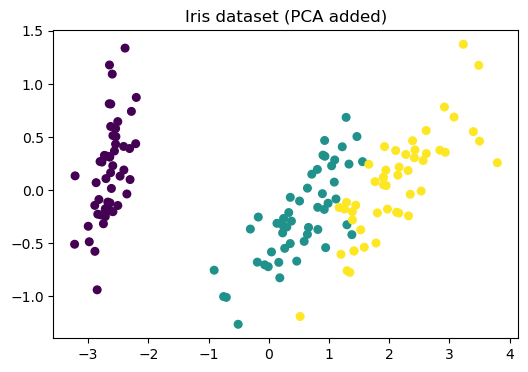

In [278]:
plt.figure(figsize=(6, 4))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=iris_y, cmap='viridis', s=30)
plt.title('Iris dataset (PCA added)')
plt.show()

In [279]:
k = 3
labels1 = kmeans_normal(iris_x, k)
labels2 = kmeans_plus_plus(iris_x, k)
labels3 = kmedians(iris_x, k)
labels4 = kmedoids(iris_x, k)

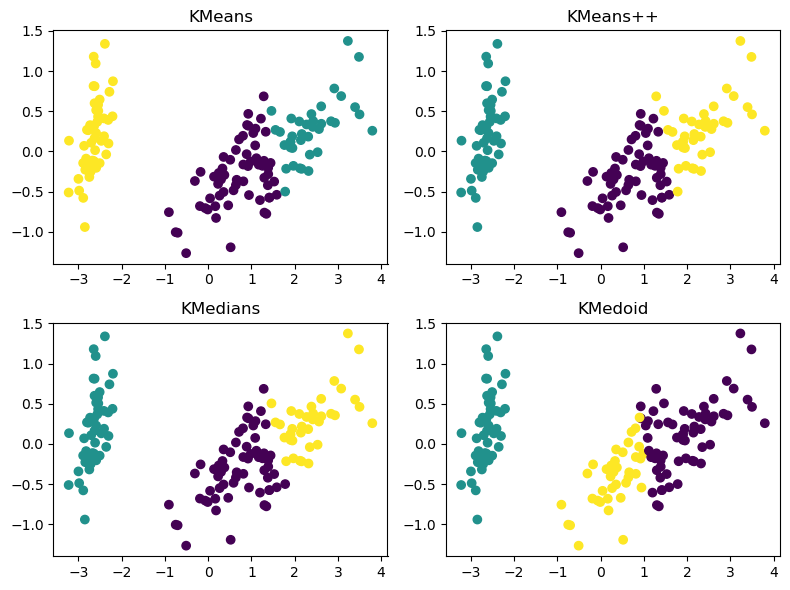

In [280]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].scatter(x_pca[:, 0], x_pca[:, 1], c=labels1)
axes[0, 0].set_title('KMeans')


axes[0, 1].scatter(x_pca[:, 0], x_pca[:, 1], c=labels2)
axes[0, 1].set_title('KMeans++')


axes[1, 0].scatter(x_pca[:, 0], x_pca[:, 1], c=labels3)
axes[1, 0].set_title('KMedians')


axes[1, 1].scatter(x_pca[:, 0], x_pca[:, 1], c=labels4)
axes[1, 1].set_title('KMedoid')

plt.tight_layout()
plt.show()